In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [96]:
import pandas as pd
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

In [123]:
def iris_type(s):
    it = {b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2} #字符串加个b是指btypes 字节串类型
    return it[s]

In [184]:
from sklearn import model_selection
# 这里使用sklearn用于数据集划分
from sklearn import datasets
# 此处引入数据所以使用了sklearn
iris = datasets.load_iris()
X_train, y_target = iris.data[:50, [2, 3]], iris.target[:50]
X_train2, y_target2 = iris.data[100:150, [2, 3]], iris.target[100:150]
X_train = np.concatenate((X_train, X_train2), axis = 0)
y_target = np.concatenate((y_target, y_target2), axis = 0)
y_target[y_target == 0] = 1
y_target[y_target == 2] = -1
data_path='./iris.data'          #数据文件的路径
EX = 0.00001
index = [2, 3]
test_size = 0.2
# iris_feature = 'sepal length', 'sepal width', 'petal lenght', 'petal width'
data = np.loadtxt(data_path,                                #数据文件路径
                      dtype=float,                              #数据类型
                      delimiter=',',                            #数据分隔符
                      converters={4:iris_type})                 #将第5列使用函数iris_type进行转换
#数据分割
x, y = np.split(data,                                       #要切分的数组
                (4,),                                       #沿轴切分的位置，第5列开始往后为y
                axis=1)                                     #1代表纵向分割，按列分割

x = x[:, index]
# 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
# 在X中我们取前两列作为特征，为了后面的可视化
y.ravel()#ravel()扁平化，将原来的二维数组转换为一维数组
print('以上是数据导入部分')


以上是数据导入部分


In [165]:
npwhere1 = np.where(y == 0)
npwhere2 = np.where(y == 1)
npwhere3 = np.where(y == 2)
data1 = data[npwhere1[0], :]
data2 = data[npwhere2[0], :]
data3 = data[npwhere3[0], :]

data12 = np.concatenate((data1, data2), axis = 0) 
data13 = np.concatenate((data1, data3), axis = 0) 
data23 = np.concatenate((data2, data3), axis = 0)
print('以上是转变为三个二分类问题')

以上是转变为三个二分类问题


In [166]:
def split(data, test_size):
    #数据分割
    x, y = np.split(data,                                       #要切分的数组
                (4,),                                       #沿轴切分的位置，第5列开始往后为y
                axis=1)                                     #1代表纵向分割，按列分割

    x = x[:, index]
    # 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
    # 在X中我们取前两列作为特征，为了后面的可视化
    y.ravel()#ravel()扁平化，将原来的二维数组转换为一维数组
    x_train,x_test,y_train,y_test=model_selection.train_test_split(x,              #所要划分的样本特征集
                                                                   y,              #所要划分的样本结果
                                                                   random_state=1, #随机数种子确保产生的随机数组相同
                                                                 test_size=test_size)  #测试样本占比
    return x_train,x_test,y_train,y_test


In [167]:
x_train,x_test,y_train,y_test = split(data, test_size)

x_train12, x_test12, y_train12, y_test12 = split(data12, test_size)
x_train13, x_test13, y_train13, y_test13 = split(data13, test_size)
x_train23, x_test23, y_train23, y_test23 = split(data23, test_size)
# print(data12)
y_test12.ravel()
y_train12[y_train12==0] = -1
y_test12[y_test12==0] = -1
y_train12.ravel()


array([-1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1.])

In [185]:
# 定义三种常见的核函数
# 线性核
def linear_kernal(**kwargs):
    def K(x1, x2):
        return np.inner(x1, x2)

    return K


# 多项式核
def polynomial_kernal(power, coef, **kwargs):
    def K(x1, x2):
        return (np.inner(x1, x2) + coef) ** power

    return K

# 径向基核
def rbf_kernal(gamma, **kwargs):
    def K(x1, x2):
        distance = np.linalg.norm(x1 - x2) ** 2
        return np.exp(-gamma * distance)

    return K
print('定义三种核函数')


定义三种核函数


In [169]:
def pred(clf1, clf2, clf3, X):
    n = len(X)
    y_pred = np.random.randint(low=0,high=2,size=(n,),dtype='int')
    z1 = clf1.predict(X)
    z2 = clf2.predict(X)
    z3 = clf3.predict(X)
    for i in range(n):
        a = 0
        b = 0
        c = 0
        if z1[i] > 0:
            a += 1
        else:
            b += 1
        if z2[i] > 0:
            a += 1
        else:
            c +=1
        if z3[i] > 0:
            b += 1
        else:
            c+=1
        if a > b and a > c:
            y_pred[i] = 0
        elif b > a and b>c:
            y_pred[i] = 1
        elif c>a and c>b:
            y_pred[i] = 2
    return y_pred
print('这一步是用于一对一多分类')

这一步是用于一对一多分类


In [170]:
class SVM(object):
    def __init__(self,str, C):
        self._support_vectors = None
        self.C = C
        self.W = None  # shape=(d,)
        self.b = None
        self.x = None  # shape=(n,d)
        self.y = None  # shape=(n,)
        self.n = 0  # Number of samples
        self.d = 0  # Feature dimension

    def __desicion_function(self, X):
        return X.dot(self.W) + self.b

    def __margin(self, X, y):
        return y * self.__desicion_function(X)

    def __cost(self, margin):
        return (1 / 2) * self.W.dot(self.W) + self.C * np.sum(np.maximum(0, 1 - margin))

    def fit(self, X, y, lr=1e-3, epochs=500):
        self.n, self.d = X.shape[0], X.shape[1]
        self.W = np.random.rand(self.d)
        self.b = np.random.rand()

        self.x = X
        self.y = y
        losses = []
        for i in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            losses.append(loss)

            missclassified_pts_idx = np.where(margin < 1)[0]
            d_W = self.W - self.C * y[missclassified_pts_idx].dot(X[missclassified_pts_idx])
            self.W = self.W - lr * d_W

            d_b = -self.C * np.sum(y[missclassified_pts_idx])
            self.b = self.b - lr * d_b

            self._support_vectors = np.where(self.__margin(X, y) < 1)[0]

    def predict(self, X):
        return np.sign(self.__desicion_function(X))

    def score(self, X, y):
        P = self.predict(X)
        return np.mean(P == y)

    def plotresult(self):
        plt.figure()
        plt.scatter(self.x[:, 0], self.x[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=0.7)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        XX, YY = np.meshgrid(xx, yy)
        xy = np.stack([XX.ravel(), YY.ravel()], axis=1)
        z = self.__desicion_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, z, colors=['r', 'b', 'r'], levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'],
                   linewidths=[2.0, 2.0, 2.0])
        ax.scatter(self.x[:, 0][self._support_vectors], self.x[:, 1][
            self._support_vectors], s = 100, linewidth = 1, facecolors = 'r', edgecolors = 'r')

        plt.show()

TestScore: 1.0


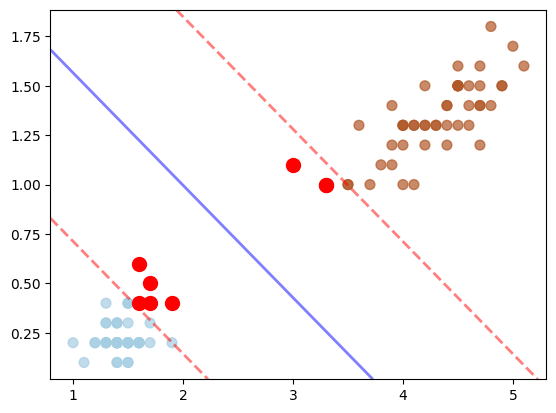

In [161]:
model = SVM('linear_kernel', C=0.5)
model.fit(x_train12, y_train12)
print(f'TestScore: {model.score(X_test, y_test)}')
model.plotresult()

TestScore: 0.99


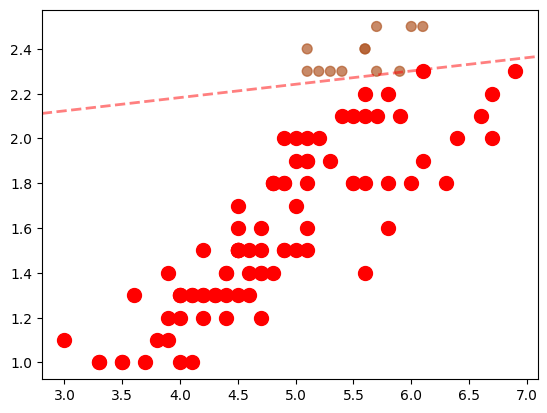

In [141]:
model = SVM('linear_kernel', C=0.2)
model.fit(x_train23, y_train23)
print(f'TestScore: {model.score(X_test, y_test)}')
model.plotresult()

TestScore: 0.99


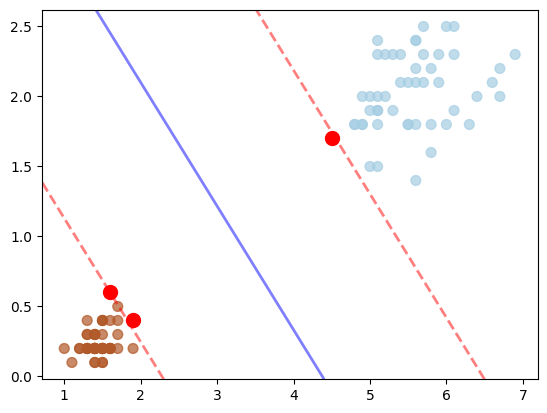

In [182]:
model = SVM('linear_kernel', C=0.5)
model.fit(x_train13, y_train13)
print(f'TestScore: {model.score(X_test, y_test)}')
model.plotresult()